# 13. Длабоки невронски мрежи

Бранислав Геразов ФЕИТ, УКИМ

Со додавање на повеќе скриени слоеви во невронската мрежа се добиваат **длабоки невронски мрежи (ДНН)**  (англ. *Deep Neural Networks (DNNs)*}.
Длабокото учење е подобласт во машинското учење која ги опфаќа моделите базирани на повеќеслојни невронски мрежи.
Иако плитките невронски мрежи претставуваат универзални апроксиматори, тоа важи само кога моќта на мрежата, одредена од бројот на неврони во скриениот слој, е доволно голема.
Се покажува дека додавање на неврони во скриениот слој, односно додавање на широчина на мрежата не е толку ефикасно како додавање повеќе слоеви, односно длабочина на мрежата.

Невронските мрежи кои постигнуваат денес надчовечки перформанси имаат и до 1000 скриени слоеви.
Поради комплексноста на тренирањето на милионите параметри на длабоките невронски мрежи, тие доживуваат процут дури на почетокот од XXI век, по општата достапност на графичките процесори кои овозможуваат паралелно процесирање на влезните податоци. 

Постојат три основни подвидови на длабоките невронски мрежи:
  - **длабоки невронски мрежи (ДНМ)** (англ. *Deep Neural Networks - DNN*) - овие се нарекуваат и **повеќеслојни перцептрони (МЛП)** (англ. *Multi Layer Perceptron - MLP*) во чест на првиот перцептрон,
  - **конволуциски невронски мрежи (КНМ)** (англ. *Convolutional Neural Networks - CNN*) - базирани на конволуција со филтри се употребуваат за процесирање на 1Д, 2Д и 3Д сигнали, а речиси секогаш за обработка на слики,
  - **рекурентни невронски мрежи (РНМ)** (англ. *Recurrent Neural Networks - RNN*) - базирани на повратна врска на невроните од скриените слоеви што им дава еден вид на меморија за претходните примероци, се употребуваат за процесирање на 1Д сигнали,
  - **рекурентни конволуциски невронски мрежи (РКНМ)** - комбинација од РНМ која го употребува излезот од КНМ, се употребуваат за процесирање на 4Д сигнали, пред сѐ видео.

<img align="middle" alt="Deep neural network" src="13_dnn_mk.png" width="600px" style="display:block; margin-left: auto; margin-right: auto;">

**Слика 1.** Една длабока невронска мрежа со 2 скриени слоја и 1 излезен слој.

\* Musiol, Martin. (2016). Speeding up Deep Learning Computational Aspects of Machine Learning.

## 13.1 Класификација со ДНН

Бидејќи за имплементација и тренирање на КНМ и РНМ ни е потребна графичка картичка, во практичниот дел ќе се задржиме на работа на ДНМ (МЛП).
Пакетот `scikit-learn` ни овозможува едноставно креирање на повеќеслојна длабока невронска мрежа со давање на листа од широчини, односно број на неврони, за секој од скриените слоеви во параметарот `hidden_layer_sizes`.

### Класификација со плитка невронска мрежа

Овој пат ќе креираме невронска мрежа за класификација.

In [1]:
from sklearn import neural_network
clf = neural_network.MLPClassifier(
    hidden_layer_sizes=(5),
    activation="relu",
    solver="adam",
    alpha=1,
    learning_rate_init=0.01,
    max_iter=1000,
    tol=1e-6,
    random_state=42,
    )

Влезните параметри се истите оние кои ги имавме кај `nerual_network.MLPRegressor` во Поглавјето 12. 
Разликата е во излезниот слој кој во овој случај ќе има неврони колку што има класи во множеството за тренирање секој со сигмоида како излезна  нелинеарност, додека кај невронската мрежа за регресија имаше еден неврон во излезниот слој кој имаше линеарна излезна функција.
Дополнително функцијата на загуба во овој случај ќе биде логаритамска веројатност наспроти средната квадратна грешка кај моделот за регресија.

За тренирање на мрежата ќе креираме множество податоци за демонстрација на класификацијата.

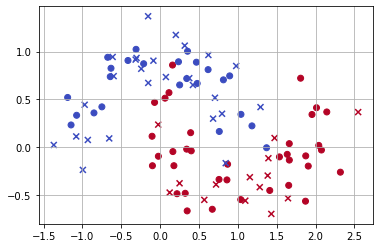

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
    )
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm")
plt.scatter(X_test[:, 0], X_test[:, 1], marker="x", c=y_test, cmap="coolwarm")
plt.grid()

Откако сме го креирале множеството за тренирање и тестирање, можеме да го искористиме за тренирање на мрежата.

loss 0.39662457008721347
epochs 540
weights [array([[ 3.14852780e-14,  8.96045328e-02,  3.71607055e-01,
        -8.87557587e-14, -3.59125320e-01],
       [-1.26067364e-13, -2.11266241e-01, -9.92633581e-01,
         7.84049390e-14,  1.40538499e+00]]), array([[ 3.69489766e-13],
       [ 2.21410801e-01],
       [ 1.06322258e+00],
       [-3.22583440e-14],
       [-1.48536930e+00]])]
biases [array([-0.88770502,  0.63827687,  1.79525064, -0.53264447,  1.16520777]), array([0.5243505])]


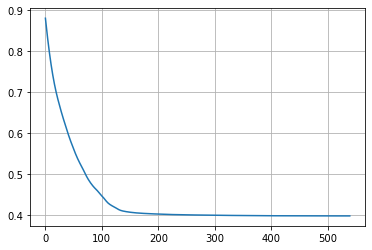

In [3]:
clf.fit(X_train, y_train)

print("loss", clf.loss_)  # последната вредност на загубата
print("epochs", clf.n_iter_)  # бројот на епохи во тренирањето
print("weights", clf.coefs_)  # тежини на невроните во мрежата
print("biases", clf.intercepts_)  # коефициенти за поместување на невроните во мрежата

plt.plot(clf.loss_curve_)
plt.grid()

Да видиме какви се резултатите.

In [4]:
print("Training set score:", clf.score(X_train, y_train))
print("Test set score:", clf.score(X_test, y_test))

Training set score: 0.8666666666666667
Test set score: 0.875


За да ја прикажеме границата на одлучување ќе ја искористиме следната функција.

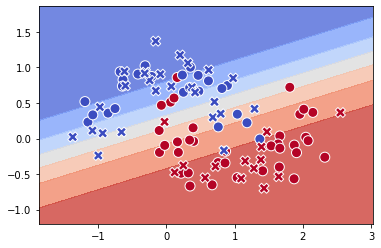

In [5]:
def plot_decision_contour(X, clf):
    plt.figure()
    h = 0.02  # step size in the mesh
    x0_min, x0_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x1_min, x1_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))
    Z = clf.predict_proba(np.column_stack([xx0.ravel(), xx1.ravel()]))[:, 1]
    Z = Z.reshape(xx0.shape)
    plt.contourf(xx0, xx1, Z, cmap="coolwarm", alpha=0.8)
    plt.scatter(
        X_train[:, 0], X_train[:, 1], s=100, edgecolors="white", c=y_train, cmap="coolwarm"
        )
    plt.scatter(
        X_test[:, 0], X_test[:, 1], s=100, edgecolors="white", marker="X", c=y_test, cmap="coolwarm"
        )

plot_decision_contour(X, clf)

Може да видиме дека постои простор за подобрување. Ајде да ја зголемиме моќта на моделот со зголемување на бројот на неврони во скриениот слој.

Training set score: 0.8666666666666667
Test set score: 0.875


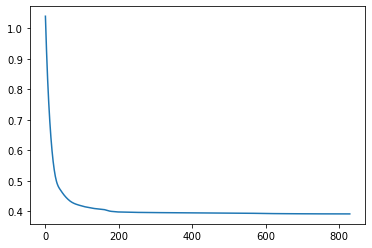

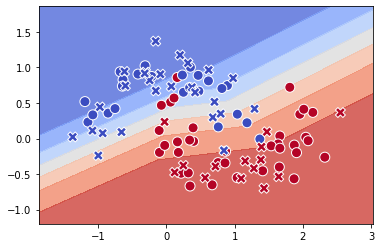

In [6]:
clf = neural_network.MLPClassifier(
    hidden_layer_sizes=(20),
    activation="relu",
    solver="adam",
    alpha=1,
    learning_rate_init=0.01,
    max_iter=1000,
    tol=1e-6,
    random_state=42,
    )
clf.fit(X_train, y_train)
plt.plot(clf.loss_curve_)
print("Training set score:", clf.score(X_train, y_train))
print("Test set score:", clf.score(X_test, y_test)) 
plot_decision_contour(X, clf)

Може да видиме дека иако кривата на разграничување визуелно подобро ја следи распределбата на двете класи, перформансите не се подобрени.

### Класификација со длабока невронска мрежа

Да видиме што ќе добиеме ако наместо плитка невронска мрежа употребиме длабока невронска мрежа со истиот број на неврони во повеќе скриени слоеви.

Training set score: 0.95
Test set score: 0.925


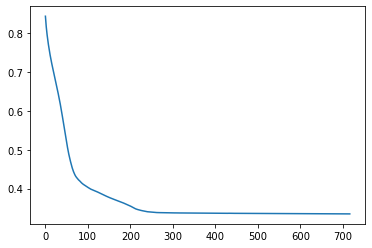

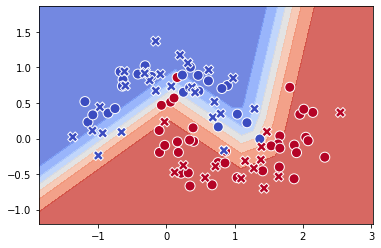

In [7]:
clf = neural_network.MLPClassifier(
    hidden_layer_sizes=(10, 10),
    activation="relu",
    solver="adam",
    alpha=1,
    learning_rate_init=0.01,
    max_iter=1000,
    tol=1e-6,
    random_state=42,
    )
clf.fit(X_train, y_train)
plt.plot(clf.loss_curve_)
print("Training set score:", clf.score(X_train, y_train))
print("Test set score:", clf.score(X_test, y_test)) 
plot_decision_contour(X, clf)

Може да видиме дека со истиот број на неврони добивме подобрени перформанси.

\* Треба да водиме сметка дека во овој случај мрежата има повеќе параметри поради зголемениот број на врски помеѓу двата скриени слоја (повеќе тежински коефициенти).

*Вежба*: пробајте со различни широчини и длабочини на невронската мрежа да добиете подобри резултати во класификацијата на множеството за тестирање. 

## 13.2 Класификација на слики со ДНН

За да ја илустрираме работата со слики ќе го искористиме податочното множество MNIST (англ. *Modified National Institute of Standards and Technology database*) кое содржи слики од рачно напишани цифри 0 - 9.
Нашата мрежа ќе треба да научи да ги распознава 10те цифри (класи) без да ѝ кажеме експлицитно како се пишуваат.

In [8]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = X / 255.0

print(X.shape)

(70000, 784)


Можеме да видиме дека станува збор за множество кое содржи 70.000 примероци од рачно напишани цифри со големина од $28 * 28 = 784$ пиксели.
Да прикажеме по еден примерок од ова множество за секоја од цифрите.

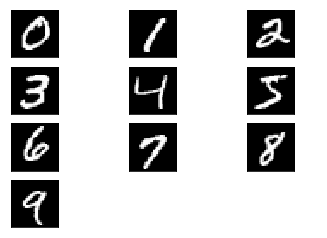

In [9]:
fig, axes = plt.subplots(4, 3)
for i, ax in zip(range(12), axes.ravel()):
    if i > 9:
        ax.axis("off")
        continue
    ind = np.where(y == str(i))[0][0]
    ax.matshow(X[ind].reshape(28, 28), cmap="gray")
    ax.set_xticks(())
    ax.set_yticks(())

За да го забрзаме процесот на тренирање на нашата невронска мрежа ќе ги земеме првите 1000 примероци од ова множество и ќе ги поделиме на множества за тренирање и тестирање.

In [10]:
X, y = X[:1000], y[:1000]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.4)

Да направиме една длабока невронска мрежа и да видиме какви резултати ќе постигнеме.

Training set score: 0.9983333333333333
Test set score: 0.83


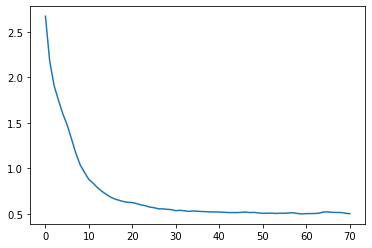

In [11]:
clf = neural_network.MLPClassifier(
    hidden_layer_sizes=(20, 10),
    activation="relu",
    solver="adam",
    alpha=3,
    learning_rate_init=0.01,
    max_iter=1000,
    tol=1e-6,
    random_state=42,
    )
clf.fit(X_train, y_train)
plt.plot(clf.loss_curve_)
print("Training set score:", clf.score(X_train, y_train))
print("Test set score:", clf.score(X_test, y_test)) 

Можеме да видиме дека мрежата релативно добро успева да ги класифицира (распознава ) рачно напишаните цифри.
За да видиме кои цифри мрежата ги меша една со друга ќе ја прикажеме **матрицата на збунетост**.

[[38  0  0  0  0  1  2  0  0  0]
 [ 0 34  1  0  0  0  0  0  0  0]
 [ 0  0 32  1  1  0  1  1  2  0]
 [ 0  1  3 38  0  2  0  1  0  0]
 [ 0  0  0  0 30  0  1  0  0  2]
 [ 1  0  1  2  2 23  3  0  3  1]
 [ 1  1  0  0  2  0 40  0  2  0]
 [ 0  5  1  0  1  0  0 41  0  2]
 [ 0  2  1  0  0  2  2  0 29  1]
 [ 1  0  1  1  5  1  0  1  2 27]]


[[<matplotlib.axis.XTick at 0x7fc79099c7f0>,
 Text(0, 0.5, 'Ground truth'),
 Text(0.5, 0, 'Prediction')]

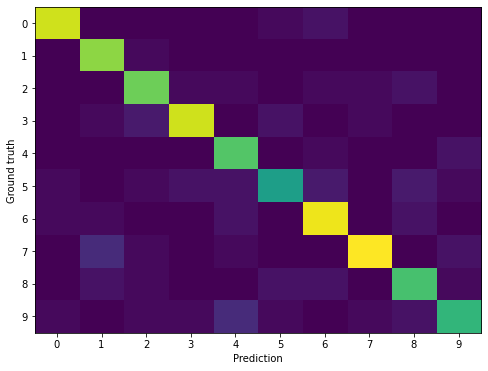

In [12]:
from sklearn import metrics
y_pred = clf.predict(X_test)
cm = metrics.confusion_matrix(
    y_test,
    y_pred,
    )
print(cm)

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm, aspect='auto', interpolation='nearest')
ax.set(
       xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       ylabel='Ground truth',
       xlabel='Prediction',
       )

Може да видиме дека цифрите кои ја „збунуваат” мрежата се 1 $\Leftrightarrow$ 7, 4 $\Leftrightarrow$ 9, 5 $\Leftrightarrow$ 9 и 5 $\Leftrightarrow$ 6.

*Вежба*: дополнувајќи го следниот код најдете за која архитектура невронската мрежа (дали плитка или длабока) дава најдобри резултати.

In [13]:
hiddens = [
    (20),
    (10, 10),
    # додадете ваши вредности
    ]

for hidden in hiddens:
    print(hidden)
    clf = neural_network.MLPClassifier(
        hidden_layer_sizes=hidden,
        activation="relu",
        solver="adam",
        alpha=1,
        learning_rate_init=0.01,
        max_iter=1000,
        tol=1e-6,
        random_state=42,
        )
    clf.fit(X_train, y_train)
    print("Training set score:", clf.score(X_train, y_train))
    print("Test set score:", clf.score(X_test, y_test)) 

20
Training set score: 1.0
Test set score: 0.88
(10, 10)
Training set score: 1.0
Test set score: 0.84


*За дома*: пробајте да имплементирате конволуциска невронска мрежа со пакетот `keras` и да добиете подобри резултати за MNIST.